**Pre-Prep**

In [10]:
pip install pillow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Counting the Dataset**

In [19]:
import os

# Function to count the number of images in a directory
def count_images_in_directory(directory):
    image_count = 0
    # Walk through the directory and its subdirectories
    for root, _, files in os.walk(directory):
        # Iterate over the files in the current directory
        for file in files:
            # Check if the file is a JPEG image
            if file.endswith(".jpg"):
                # Increment the image count
                image_count += 1
    return image_count

# Directories to search for images
directories = [
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/images'
]

# Iterate over each directory and count the images
for directory in directories:
    image_count = count_images_in_directory(directory)
    print(f"Directory: {directory}, Image Count: {image_count}")

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images, Image Count: 169
Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images, Image Count: 3631
Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/images, Image Count: 348


**Different of Fractured and non-Fractured Images**

In [20]:
import os

# Function to count the number of images with and without labels in a directory
def count_images_with_labels(directory):
    labeled_image_count = 0
    unlabeled_image_count = 0
    # Iterate over the directory and its subdirectories
    for root, _, _ in os.walk(directory):
        # Get the paths to the image and label directories
        image_dir = os.path.join(root, 'images')
        label_dir = os.path.join(root, 'labels')
        # Iterate over the files in the image directory
        for _, _, files in os.walk(image_dir):
            for file in files:
                # Check if the file is a JPEG image
                if file.endswith(".jpg"):
                    # Get the full paths to the image and label files
                    image_path = os.path.join(image_dir, file)
                    label_path = os.path.join(label_dir, file.replace(".jpg", ".txt"))
                    # Check if the label file exists
                    if os.path.exists(label_path):
                        # Read the content of the label file
                        with open(label_path, 'r') as f:
                            label_content = f.read().strip()
                            # Check if the label has content
                            if label_content:
                                labeled_image_count += 1
                            else:
                                unlabeled_image_count += 1
                    else:
                        unlabeled_image_count += 1
    return labeled_image_count, unlabeled_image_count

# Directories to search for images and labels
directories = [
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid'
]

# Iterate over each directory and count the images with and without labels
for directory in directories:
    labeled_count, unlabeled_count = count_images_with_labels(directory)
    total_count = labeled_count + unlabeled_count
    # Print the counts for each directory
    print(f"Directory: {directory}")
    print(f"Total Images: {total_count}")
    print(f"Images with Labels: {labeled_count}")
    print(f"Images without Labels: {unlabeled_count}\n")

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test
Total Images: 169
Images with Labels: 83
Images without Labels: 86

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train
Total Images: 3631
Images with Labels: 1804
Images without Labels: 1827

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid
Total Images: 348
Images with Labels: 173
Images without Labels: 175



**Analysing the Different Dimensions**

In [21]:
from collections import Counter
import os
from PIL import Image

# Function to retrieve dimensions of images in a directory
def get_image_dimensions(directory):
    dimensions = []
    # Iterate over the directory and its subdirectories
    for root, _, files in os.walk(directory):
        for file in files:
            # Check if the file is a JPEG image
            if file.endswith(".jpg"):
                # Get the full path to the image file
                image_path = os.path.join(root, file)
                # Open the image file and get its dimensions
                with Image.open(image_path) as img:
                    dimensions.append(img.size)
    return dimensions

# Function to count the occurrences of each image dimension
def count_image_dimensions(dimensions):
    dimension_counts = Counter(dimensions)
    return dimension_counts

# Function to retrieve the top N dimensions with the highest counts
def top_n_dimensions(dimension_counts, n=5):
    top_n = dimension_counts.most_common(n)
    return top_n

# Function to count the number of dimensions with only one occurrence
def count_single_dimensions(dimension_counts):
    single_count_dimensions = sum(1 for count in dimension_counts.values() if count == 1)
    return single_count_dimensions

# Directories containing the images
directories = [
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/images'
]

# Iterate over each directory and process the images
for directory in directories:
    print(f"Directory: {directory}\n")
    # Retrieve dimensions of images in the directory
    dimensions = get_image_dimensions(directory)
    # Count the occurrences of each image dimension
    dimension_counts = count_image_dimensions(dimensions)
    # Retrieve the top 5 dimensions with the highest counts
    top_5 = top_n_dimensions(dimension_counts)
    # Count the number of dimensions with only one occurrence
    single_count = count_single_dimensions(dimension_counts)
    
    # Print the top 5 dimensions with the highest counts
    print("Top 5 dimensions with the highest counts:")
    for i, (dimension, count) in enumerate(top_5, 1):
        print(f"{i}. Dimension: {dimension}, Count: {count}")

    # Print the number of images with one unique dimension
    print("\nThe number of images with one unique dimension:" f" {single_count}\n")

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images

Top 5 dimensions with the highest counts:
1. Dimension: (406, 512), Count: 20
2. Dimension: (420, 512), Count: 18
3. Dimension: (512, 406), Count: 15
4. Dimension: (379, 512), Count: 6
5. Dimension: (512, 420), Count: 6

The number of images with one unique dimension: 79

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images

Top 5 dimensions with the highest counts:
1. Dimension: (420, 512), Count: 518
2. Dimension: (406, 512), Count: 443
3. Dimension: (512, 406), Count: 255
4. Dimension: (512, 512), Count: 129
5. Dimension: (512, 420), Count: 117

The number of images with one unique dimension: 0

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/images

Top 5 dimensions with the highest counts:
1. Dimension: (420, 512), Count: 48
2. Dimension: (406, 512), Count: 32
3. Dimension: (512, 406), Count: 30
4. Dimension: (512, 512), Count:

In [29]:
import os
from PIL import Image

def find_min_max_dimensions(directory):
    min_length = float('inf')
    min_width = float('inf')
    max_length = 0
    max_width = 0
    min_image_path = None
    max_image_path = None
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):  # Assuming images are in JPEG format
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    if width * height < min_length * min_width:
                        min_length = width
                        min_width = height
                        min_image_path = image_path
                    if width * height > max_length * max_width:
                        max_length = width
                        max_width = height
                        max_image_path = image_path
    
    return min_length, min_width, min_image_path, max_length, max_width, max_image_path

directories = [
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train',
    '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid'
]

for directory in directories:
    min_length, min_width, min_image_path, max_length, max_width, max_image_path = find_min_max_dimensions(directory)
    print(f"Directory: {directory}")
    print(f"Image with Smallest Dimensions: {min_image_path}, Dimensions: {min_length}x{min_width}")
    print(f"Image with Largest Dimensions: {max_image_path}, Dimensions: {max_length}x{max_width}\n")

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test
Image with Smallest Dimensions: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images/image1_4521_png.rf.9d460c80d2b830fc35b17c628a6d6290.jpg, Dimensions: 119x512
Image with Largest Dimensions: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg, Dimensions: 801x2048

Directory: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train
Image with Smallest Dimensions: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images/image1_3_png.rf.4f3936b1954ddb019efef8efe3594f6e.jpg, Dimensions: 135x406
Image with Largest Dimensions: /home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/images/elbow-dislocation-with-coronoid-process-fracture_jpg.rf.75b67d2e40fe637ba2838e1283f970c5.jpg, Dimensions: 2048x2048

Directory: /home/elt/rw372/notebook/COMP8260 -

**Image Resizing**

Experiment with different resizing techniques, such as bilinear, bicubic, or Lanczos interpolation, to see which one preserves image details better for your task

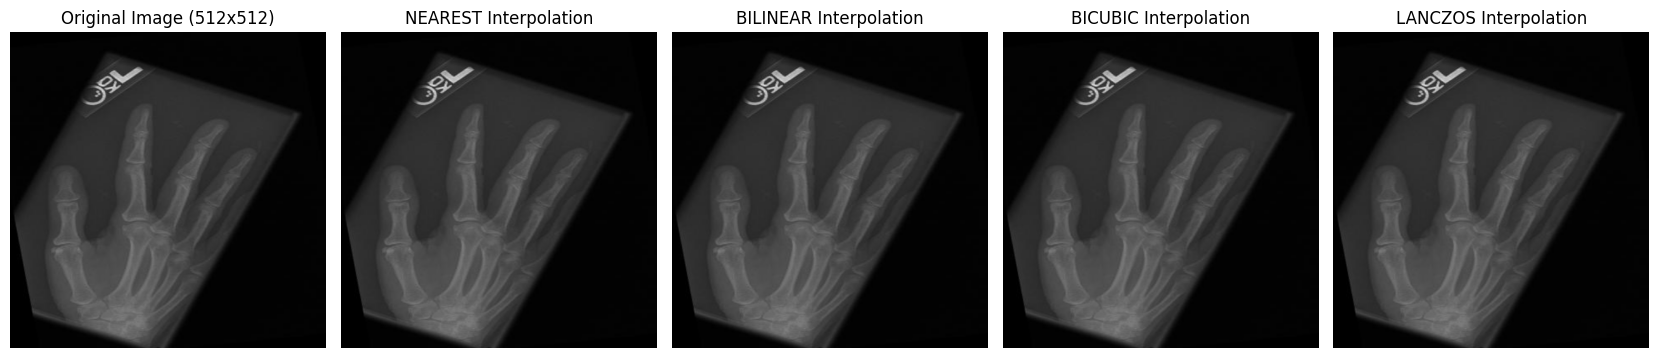

In [67]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = np.random.choice(image_files)

# Define different interpolation methods
interpolation_methods = ['NEAREST', 'BILINEAR', 'BICUBIC', 'LANCZOS']

# Function to visualize resized images with different interpolation methods
def visualize_resized_images(image_path, interpolation_methods):
    # Open the original image
    original_image = Image.open(image_path)

    # Resize original image to 512x512
    resize_transform = transforms.Resize((512, 512))
    resized_original = resize_transform(original_image)

    # Plot original image
    plt.figure(figsize=(20, 4))
    plt.subplot(1, len(interpolation_methods) + 2, 1)
    plt.imshow(resized_original)
    plt.title('Original Image (512x512)')
    plt.axis('off')

    # Apply each interpolation method and plot the resized image
    for i, method in enumerate(interpolation_methods, start=2):
        # Convert interpolation method name to Pillow constant
        interpolation = getattr(Image, method)
        # Define transformation with the specified interpolation method
        transform = transforms.Resize(resized_original.size, interpolation=interpolation)
        # Apply transformation to the image
        resized_image = transform(resized_original)
        # Plot resized image
        plt.subplot(1, len(interpolation_methods) + 2, i)
        plt.imshow(resized_image)
        plt.title(f'{method} Interpolation')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize resized images with different interpolation methods
visualize_resized_images(random_image_path, interpolation_methods)

Bilinear interpolation is fast but may produce blurrier results, bicubic interpolation offers smoother results at the cost of increased computation, and Lanczos interpolation preserves more detail but may introduce artifacts and requires even more computation. The choice of interpolation method depends on the specific requirements of the application and the desired balance between computational efficiency and image quality.

Nearest Neighbor:

Nearest Neighbor interpolation is the simplest method and involves selecting the nearest pixel value to determine the color of a pixel in the resized image.
It is fast and computationally efficient but may result in aliasing artifacts and loss of image quality, especially when resizing to a larger size.
Nearest Neighbor interpolation works well for simple, pixelated graphics but is not suitable for images with smooth gradients or detailed textures.

**Dataset Size Conversion**

In [34]:
import os
from PIL import Image

def resize_image(image_path, target_size=(512, 512)):
    with Image.open(image_path) as img:
        resized_img = img.resize(target_size)
    return resized_img

def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

def convert_dataset(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        for dir in dirs:
            source_sub_dir = os.path.join(root, dir)
            dest_sub_dir = os.path.join(destination_dir, os.path.relpath(source_sub_dir, source_dir))
            create_folder_if_not_exists(dest_sub_dir)
        
        for file in files:
            if file.endswith(".jpg"):  # Assuming images are in JPEG format
                image_path = os.path.join(root, file)
                rel_root = os.path.relpath(root, source_dir)
                label_folder_path = os.path.join(destination_dir, rel_root)
                
                # Resize image
                resized_img = resize_image(image_path)
                
                # Save resized image
                save_path = os.path.join(label_folder_path, file)
                resized_img.save(save_path)

# Define source and destination directories
source_directory = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset'
destination_directory = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Converted_Dataset'

# Convert dataset
convert_dataset(source_directory, destination_directory)

print("Dataset conversion completed.")

Dataset conversion completed.


**Comparing different Dimensions**

Experimenting with resolution: 28x28


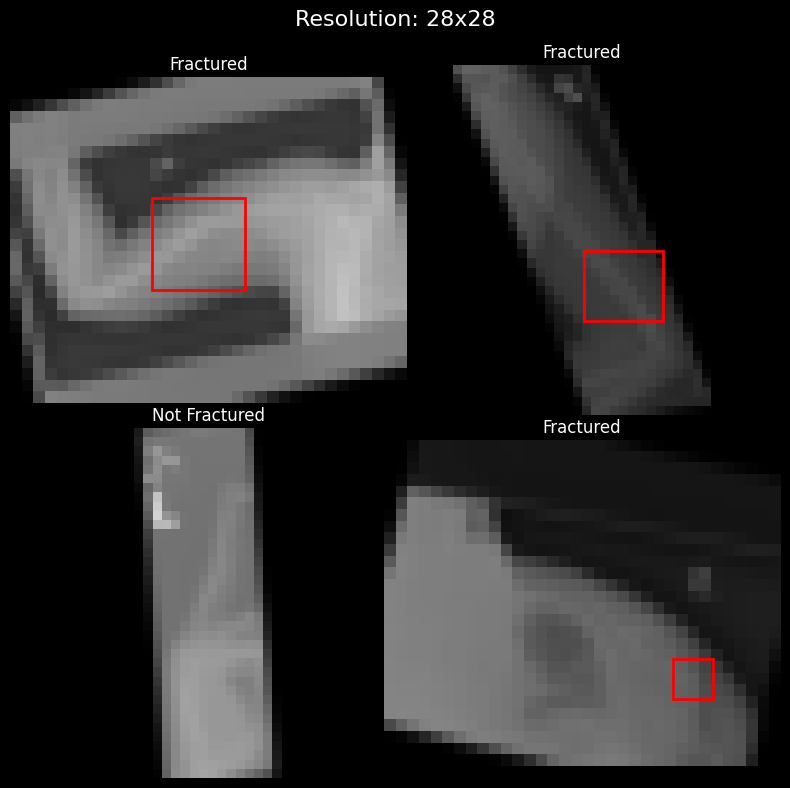

Experimenting with resolution: 56x56


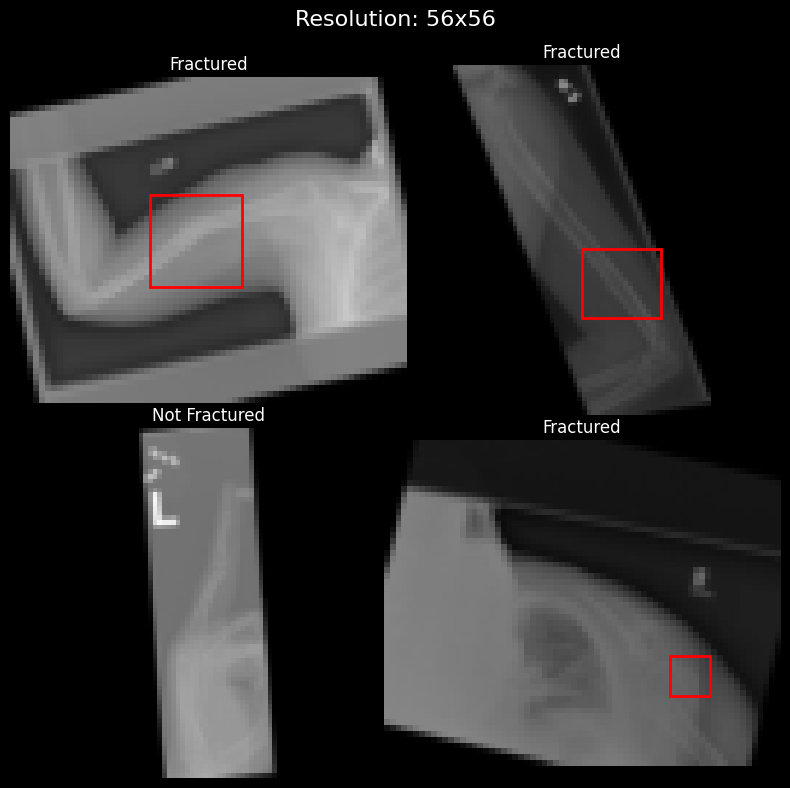

Experimenting with resolution: 128x128


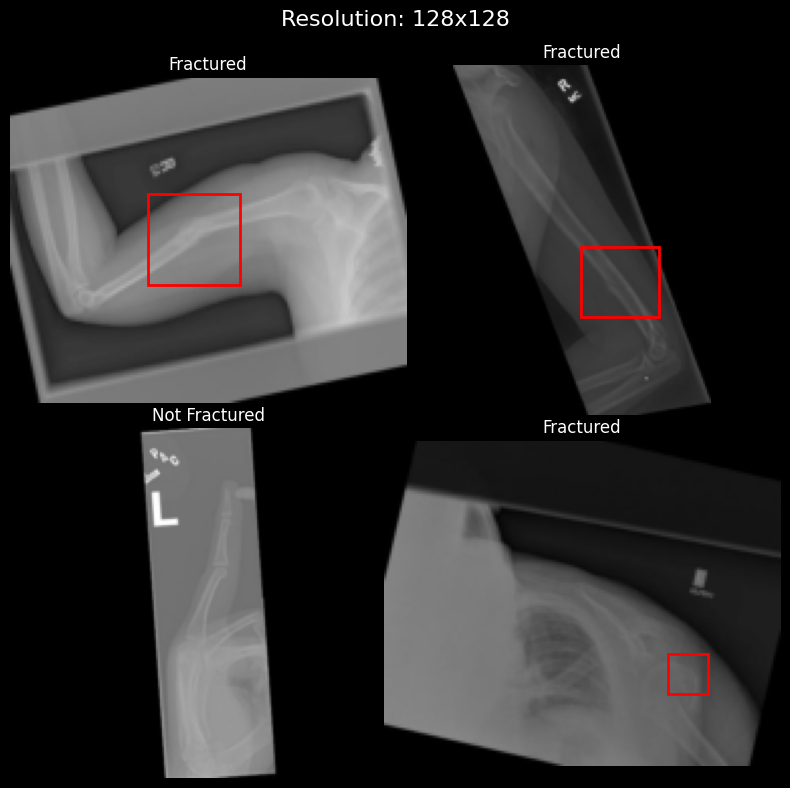

Experimenting with resolution: 256x256


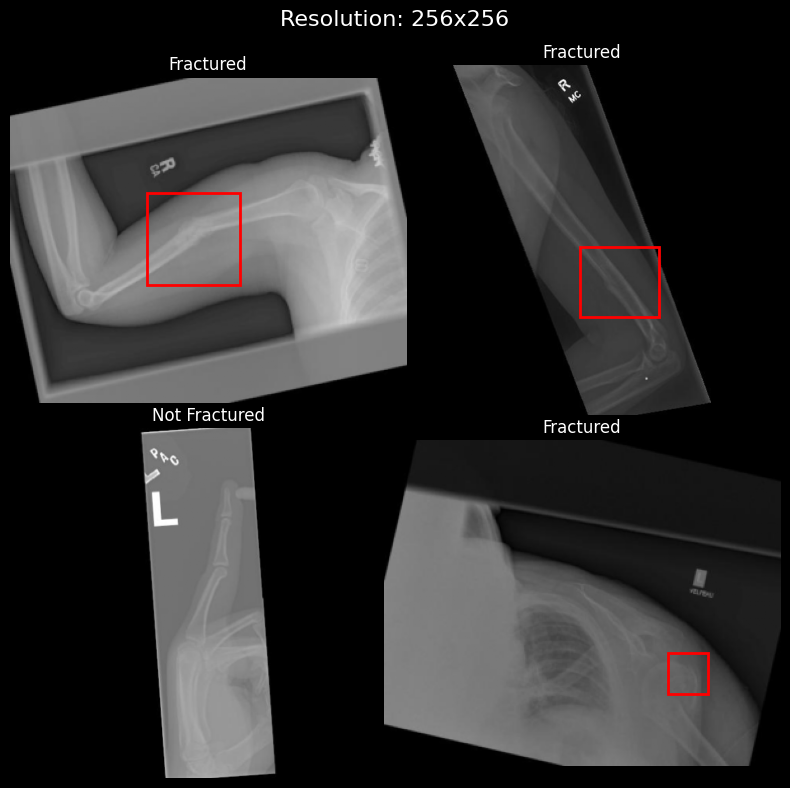

Experimenting with resolution: 512x512


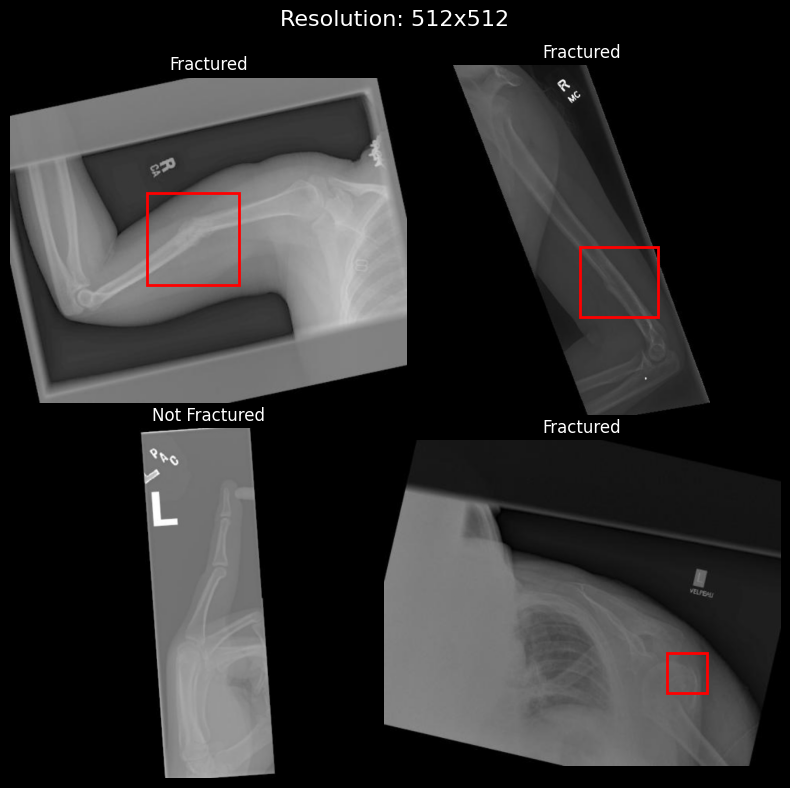

In [26]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# Define directories
Test = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/'
Train = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/'
Valid = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/'

# Define transforms for experimenting with different image resolutions
def get_transform(load_shape):
    return transforms.Compose([
        transforms.Resize(load_shape),
        transforms.ToTensor(),
    ])

# Adjust the ImageDataset class to accept the load_shape parameter
class ImageDataset(Dataset):
    def __init__(self, root, transform=None, mode='train', load_shape=128):
        self.transform = transform
        self.load_shape = load_shape
        self.files = sorted(glob.glob(os.path.join(root, mode) + '/images/*.jpg'))
        self.labels = {}
        self.boxes = {}
        assert len(self.files) > 0, "Make sure you downloaded the images!"

    def get_image(self, index):
        item = self.transform(Image.open(self.files[index % len(self.files)]))
        if item.shape[0] != 3: 
            item = item.repeat(3, 1, 1)
        return item

    def get_labels(self, index):
        if index in self.labels:
            return self.labels[index]
        labels = []
        boxes = []
        text_file = self.files[index % len(self.files)].replace(".jpg", ".txt").replace("images", "labels")
        with open(text_file, mode="r") as f:
            lines = f.readlines()
            for line in lines:
                values = [float(value) for value in line.split()]
                label = int(values[0])
                coords = values[1:]
                coords = torch.reshape(torch.FloatTensor(coords), (int(len(coords)/2), 2))
                size = torch.tensor([self.get_image(index).shape[2], self.get_image(index).shape[1]])
                min_coords = torch.min(coords, dim=0).values * size
                max_coords = torch.max(coords, dim=0).values * size
                box = torch.cat((min_coords, max_coords), dim=0).tolist()
                labels.append(label)
                boxes.append(box)
        self.labels[index] = labels
        self.boxes[index] = torch.FloatTensor(boxes)  # Changed to FloatTensor
        return labels
    
    def get_boxes(self, index):
        if index in self.boxes:
            return self.boxes[index]
        _ = self.get_labels(index)
        return self.boxes[index]

    def __len__(self):
        return len(self.files)

# Define function to visualize images with labels in a grid layout
def show_with_labels_grid(imgs, labels, boxes, resolution):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    fig.patch.set_facecolor('black')  # Set the background color of the figure to black
    for i, ax in enumerate(axs.flat):
        img = imgs[i].detach().numpy().transpose((1, 2, 0))
        img = np.clip(img, 0, 1)  # Clip values to [0, 1]
        ax.imshow(img)
        if labels:
            label = "Fractured" if labels[i] else "Not Fractured"
        else:
            label = "Not Fractured"  # Default label if no bounding boxes
        ax.set_title(label, color='white')  # Set title as "Fractured" or "Not Fractured" with white color
        ax.axis('off')
        if labels[i]:
            for box in boxes[i]:
                x_min, y_min, x_max, y_max = box
                rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='r', linewidth=2)
                ax.add_patch(rect)
    fig.suptitle(f"Resolution: {resolution}x{resolution}", fontsize=16, color='white')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Experimenting with different resolutions
resolutions = [28, 56, 128, 256, 512]  # Define resolutions to experiment with

# Generate a single set of random indices to use for all resolutions
num_samples = 4
random_indices = np.random.choice(len(ImageDataset("/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset")), 
                                   num_samples, replace=False)

for resolution in resolutions:
    print(f"Experimenting with resolution: {resolution}x{resolution}")
    # Load the image dataset with the specified resolution
    dataset = ImageDataset("/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset", 
                           transform=get_transform(resolution), load_shape=resolution)
    # Fetch the images using the pre-generated random indices
    images = [dataset.get_image(index) for index in random_indices]
    labels = [dataset.get_labels(index) for index in random_indices]
    boxes = [dataset.get_boxes(index) for index in random_indices]
    # Display a few sample images in a grid layout
    show_with_labels_grid(images, labels, boxes, resolution)

**1. The transforms.Compose function from the torchvision library. These transforms resize the images to the desired resolution and convert them to tensors.**

**2. The ImageDataset Class loads images from the specified directory, applies transformations, and retrieves labels and bounding boxes associated with each image.**

**3. The Show_with_labels_grid Function is responsible for visualizing images with their corresponding labels and bounding boxes in a grid layout. It uses matplotlib to display the images in a grid with appropriate titles and bounding boxes if applicable.**

**4. Experimenting with Resolutions: The code iterates over a list of resolutions defined beforehand. For each resolution, it performs the following steps:**

Loads the dataset with the specified resolution using the ImageDataset class.

Retrieves a set of random indices from the dataset.

Fetches the images, labels, and bounding boxes associated with these indices.

Displays the images in a 2x2 grid layout using the show_with_labels_grid function.

**5. Using the Same Set of Images to ensure that the same set of images is used for each resolution, a single set of random indices is generated before the loop.**

**Other Pre-Processing Techniques**

**Normalization**

Normalize the pixel values of images to a common scale (e.g., [0, 1] or [-1, 1]). This helps in speeding up training and improving convergence.

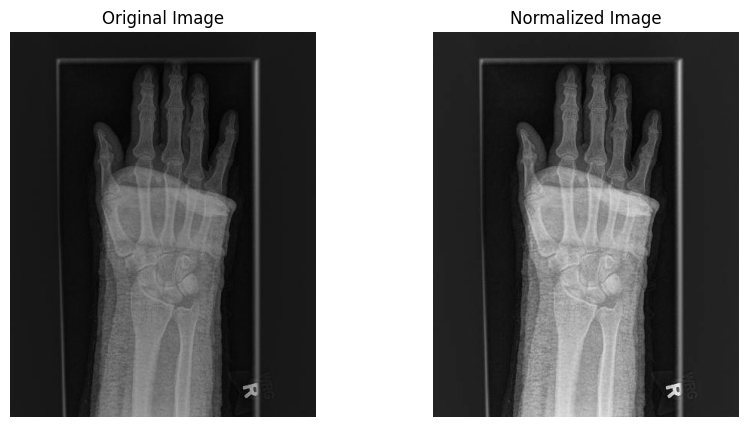

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Directory containing the images
directory = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/images'

# List all the image files in the directory
image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.jpg')]

# Choose a random image file
random_image_path = random.choice(image_files)

# Load the random image
random_image = Image.open(random_image_path)

# Convert the image to a numpy array
image_array = np.array(random_image)

# Normalize the image array
normalized_image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Plot the original and normalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image_array)
plt.title("Normalized Image")
plt.axis('off')

plt.show()

**Normalizsed Dataset**

In [1]:
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the directory containing the original dataset
original_dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Define the directory to save the normalized and resized images
output_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Normalized_Resized_Dataset"

# Define the target size for resizing
target_size = (256, 256)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to normalize and resize an image
def normalize_and_resize_image(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Normalize the pixel values
    image_array = np.array(image)
    normalized_image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
    
    # Resize the image
    resized_image = image.resize(target_size)
    
    return resized_image

print("Normalization and resizing completed.")

Normalization and resizing completed.


**Histogram Equalization**

Enhance the contrast of images by performing histogram equalization. This technique adjusts the intensity distribution of pixels, particularly useful for images with poor contrast.

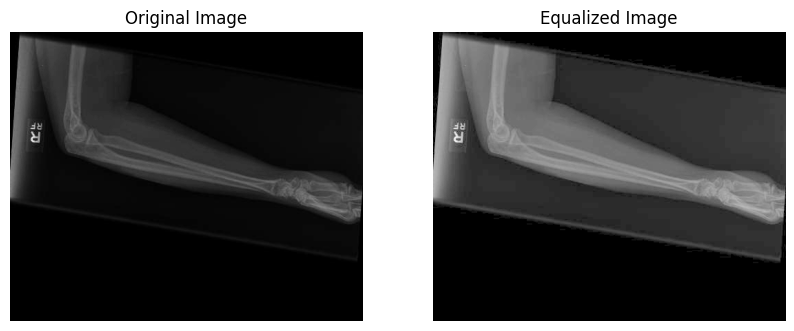

In [15]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to apply histogram equalization to a single image using PIL
def apply_histogram_equalization(image_path):
    try:
        # Open the image
        with Image.open(image_path) as img:
            # Convert the image to grayscale
            img_gray = img.convert('L')
            # Apply histogram equalization
            equalized_img = Image.eval(img_gray, lambda x: (255 * (x / 255) ** 0.5))
        return img_gray, equalized_img
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)
        return None, None

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = random.choice(image_files)

# Apply histogram equalization to the random image
original_image, equalized_image = apply_histogram_equalization(random_image_path)

# Display the original and equalized images
if original_image is not None and equalized_image is not None:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()
else:
    print("Failed to process the image.")

Histogram equalization aims to improve the contrast and brightness of an image by spreading out the intensity values. Ideally, after histogram equalization, the histogram of the image should be spread out over the entire range of intensity values (typically 0 to 255 for grayscale images), leading to better visualization of details and features in the image.

Visually, you should expect the following changes in the equalized image compared to the original:

Improved Contrast: Regions with low contrast in the original image may have enhanced contrast in the equalized image, making details more visible.
Enhanced Brightness: Dark regions in the original image may become brighter in the equalized image, leading to better visibility of features.
Spread-out Histogram: The histogram of the equalized image should be more evenly distributed across the entire range of intensity values.

**Histogram Equalization vs Normalization**

**Image Denoising**

Apply denoising techniques to remove noise from images, such as Gaussian blur, median filtering, or wavelet denoising.

1/1 [==============================] - 0s 500ms/step


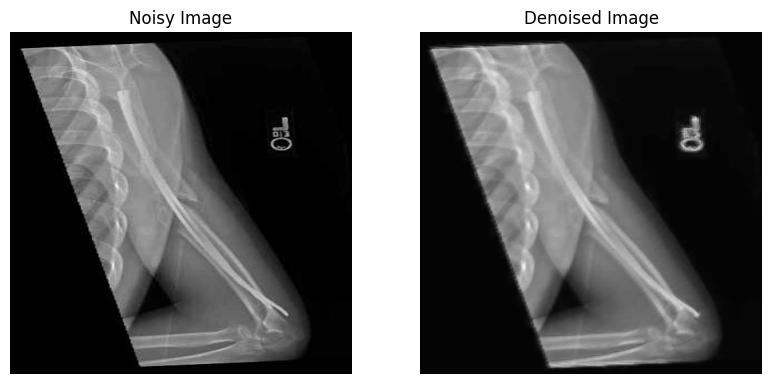

In [22]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the U-Net model for denoising
def unet_denoiser(input_shape=(512, 512, 1)):
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Decoder
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    up1 = UpSampling2D(size=(2, 2))(conv2)
    denoised = Conv2D(1, 3, activation='sigmoid', padding='same')(up1)
    
    model = Model(inputs=inputs, outputs=denoised)
    return model

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = random.choice(image_files)

# Create the denoiser model
denoiser = unet_denoiser(input_shape=(512, 512, 1))

# Load and preprocess the noisy image
noisy_image = Image.open(random_image_path)
noisy_image = noisy_image.convert("L")  # Convert to grayscale
noisy_image = noisy_image.resize((512, 512))  # Resize to match model input size
noisy_image = np.array(noisy_image)  # Convert to numpy array
noisy_image = np.expand_dims(noisy_image, axis=-1)  # Add channel dimension

# Normalize the image to range [0, 1]
noisy_image = noisy_image / 255.0

# Denoise the image
denoised_image = denoiser.predict(np.array([noisy_image]))

# Display the original, noisy, and denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image.squeeze(), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image.squeeze(), cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

**Other Techniques to try if needed -**

Edge Detection: Apply edge detection algorithms, such as Sobel, Prewitt, or Canny edge detection, to highlight object boundaries or key features in images.

Image Enhancement: Experiment with image enhancement techniques like sharpening, smoothing, or contrast stretching to improve the overall visual quality of images.

Data Balancing: Ensure that your dataset is balanced across different classes to prevent bias and improve the generalization ability of your model.

Feature Extraction: Utilize pre-trained convolutional neural networks (CNNs) to extract features from images and use them as input to your model, rather than raw pixel values.

Dimensionality Reduction: Apply techniques like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to reduce the dimensionality of image data while preserving important information.

In [ ]:
2. Resize the images to different resolutions

In [22]:
def resize_images(image_paths, resolutions):
    resized_images = {}
    for resolution in resolutions:
        resized_images[resolution] = [resize_image(image_path, resolution) for image_path in image_paths]
    return resized_images

def resize_image(image_path, resolution):
    image = Image.open(image_path)
    resized_image = image.resize((resolution, resolution))
    return np.array(resized_image)

# Assuming you have a list of image paths in the `images` variable
images = [os.path.join(Test, file) for file in os.listdir(Test) if file.endswith('.jpg')]

# Define resolutions to resize the images to
resolutions = [28, 56, 128, 256, 512]

# Resize the images
resized_images = resize_images(images, resolutions)

In [23]:
import matplotlib.pyplot as plt

# Define a function to visualize resized images
def show_resized_images(resized_images, num_images=3):
    for resolution, images in resized_images.items():
        print(f"Resolution: {resolution}x{resolution}")
        for i in range(min(num_images, len(images))):
            plt.imshow(images[i])
            plt.title(f"Image {i+1}")
            plt.axis("off")
            plt.show()

# Visualize the resized images
show_resized_images(resized_images)

Resolution: 28x28
Resolution: 56x56
Resolution: 128x128
Resolution: 256x256
Resolution: 512x512


In [ ]:
3. Split the dataset into training and testing sets.

In [24]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define directories
Test = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/test/'
Train = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/train/'
Valid = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset/valid/'

def count_images(directory):
    num_images = sum(len(files) for _, _, files in os.walk(directory))
    return num_images

def load_dataset(directory, resolutions):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):  # Assuming images are in JPEG format
                image_path = os.path.join(root, file)
                label = 1 if "fractured" in root else 0  # Assuming directory names indicate labels
                labels.append(label)
                images.append(image_path)

    X_train, X_test, y_train, y_test = {}, {}, {}, {}

    for resolution in resolutions:
        resized_images = [resize_image(image, resolution) for image in images]
        X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
            resized_images, labels, test_size=0.2, random_state=42
        )
        X_train[resolution] = X_train_res
        X_test[resolution] = X_test_res
        y_train[resolution] = y_train_res
        y_test[resolution] = y_test_res

    return X_train, X_test, y_train, y_test

def resize_image(image_path, resolution):
    image = Image.open(image_path)
    resized_image = image.resize((resolution, resolution))
    return np.array(resized_image)

def show_dataset_info(X_train, X_test):
    for resolution, X_train_res in X_train.items():
        print(f"Resolution: {resolution}x{resolution}")
        print(f"Training set size: {len(X_train_res)}")
        print(f"Testing set size: {len(X_test[resolution])}\n")

# Define resolutions to experiment with
resolutions = [28, 56, 128, 256, 512]

# Load the dataset for each resolution
X_train, X_test, y_train, y_test = load_dataset(Train, resolutions)

# Show dataset information
show_dataset_info(X_train, X_test)

Resolution: 28x28
Training set size: 2904
Testing set size: 727

Resolution: 56x56
Training set size: 2904
Testing set size: 727

Resolution: 128x128
Training set size: 2904
Testing set size: 727

Resolution: 256x256
Training set size: 2904
Testing set size: 727

Resolution: 512x512
Training set size: 2904
Testing set size: 727



In [ ]:
4. Train a CNN model on each resolution.

In [27]:
from tensorflow.keras import models, layers

def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

2024-03-19 13:42:37.326994: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 13:42:37.327078: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 13:42:37.327128: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 13:42:39.254986: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
import numpy as np

def train_model(X_train, y_train, X_test, y_test):
    models_dict = {}
    for resolution, X_train_res in X_train.items():
        print(f"Training model for resolution: {resolution}x{resolution}")
        X_train_res = np.array(X_train_res)  # Convert to NumPy array
        y_train_res = np.array(y_train[resolution])  # Convert to NumPy array
        X_test_res = np.array(X_test[resolution])  # Convert to NumPy array
        y_test_res = np.array(y_test[resolution])  # Convert to NumPy array
        model = create_model(input_shape=(resolution, resolution, 3))
        history = model.fit(X_train_res, y_train_res, epochs=10, validation_data=(X_test_res, y_test_res), verbose=0)
        models_dict[resolution] = model
    return models_dict

# Train models on each resolution
models_dict = train_model(X_train, y_train, X_test, y_test)

Training model for resolution: 28x28
Training model for resolution: 56x56
Training model for resolution: 128x128
Training model for resolution: 256x256
Training model for resolution: 512x512


In [ ]:
5. Evaluate the model's performance on the testing set for each resolution

In [30]:
def evaluate_models(models_dict, X_test, y_test):
    results = {}
    for resolution, model in models_dict.items():
        X_test_res = np.array(X_test[resolution])  # Convert to NumPy array
        y_test_res = np.array(y_test[resolution])  # Convert to NumPy array
        _, test_accuracy = model.evaluate(X_test_res, y_test_res, verbose=0)
        results[resolution] = test_accuracy
    return results

# Evaluate the models on the testing set
test_results = evaluate_models(models_dict, X_test, y_test)
print("Testing Accuracy for Each Resolution:")
for resolution, accuracy in test_results.items():
    print(f"Resolution: {resolution}x{resolution}, Accuracy: {accuracy}")

Testing Accuracy for Each Resolution:
Resolution: 28x28, Accuracy: 1.0
Resolution: 56x56, Accuracy: 1.0
Resolution: 128x128, Accuracy: 1.0
Resolution: 256x256, Accuracy: 1.0
Resolution: 512x512, Accuracy: 1.0
